## Задача 1. 60 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственник, риелтор, застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 10 баллов

In [ ]:
import pandas as pd
df = pd.read_csv('/rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [ ]:
df.head()

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

In [ ]:
df.describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [ ]:
print(f"Количество уникальных значений у переменной metro = {len(df['metro'].unique())}")
df.describe(include='object')

Количество уникальных значений у переменной metro = 119


,metro,way,provider
count,1446,1446,1446
unique,119,2,7
top,Planernaia,walk,realtor
freq,126,1331,615


4. Есть ли в датасете пропуски? (**1**)

Нет пропусков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metro         1446 non-null   object
 1   price         1446 non-null   int64 
 2   way           1446 non-null   object
 3   views         1446 non-null   int64 
 4   provider      1446 non-null   object
 5   fee_percent   1446 non-null   int64 
 6   storey        1446 non-null   int64 
 7   minutes       1446 non-null   int64 
 8   storeys       1446 non-null   int64 
 9   living_area   1446 non-null   int64 
 10  kitchen_area  1446 non-null   int64 
 11  total_area    1446 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 146.9+ KB


5. Есть ли в датасете полные дубликаты? (**1**)

1201 полных дубликатов

In [ ]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)#1201 полных дубликатов
df = df.drop_duplicates()
df

1201


,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Buninskaia Alleia,29000,transport,25,Застройщик,50,3,18,9,37,37,37
243,Liublino,43000,walk,23,agency,70,1,11,5,16,6,31
244,Botanicheskii sad,60000,walk,21,Застройщик,50,5,2,26,37,37,37
245,No data,30000,walk,9,agency,0,2,0,4,37,37,37


6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**1**)

У переменной provider 7 уникальных значений, что неверно, так как добавились лишние символы пробелов и т.д. Их можно исправить с помощью метода strip()

In [ ]:
df['provider'].unique()
df['provider'] = df['provider'].str.strip()
df['provider'].unique()

array(['realtor', 'owner', 'agency', 'Застройщик'], dtype=object)

7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**1**)

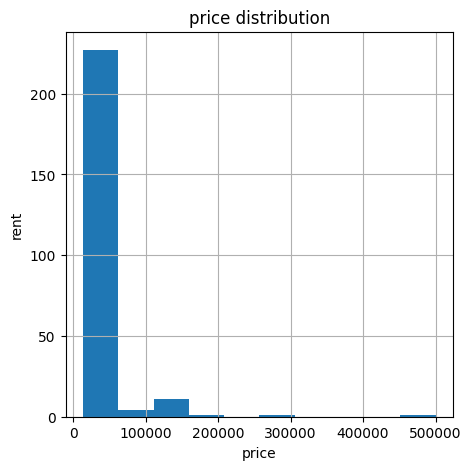

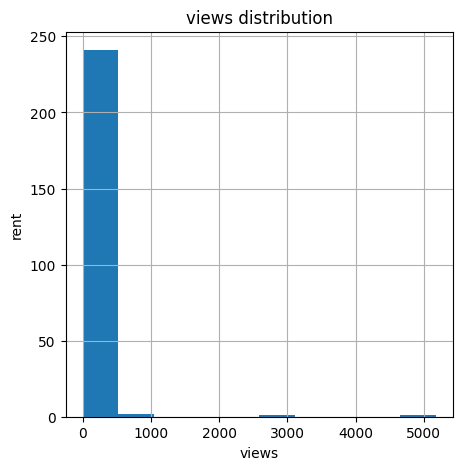

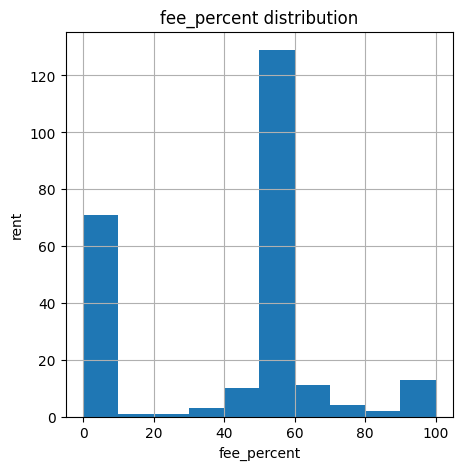

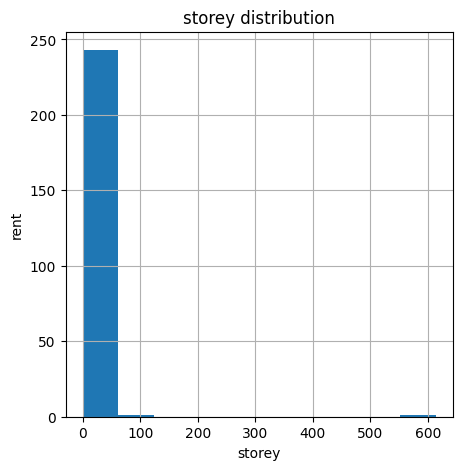

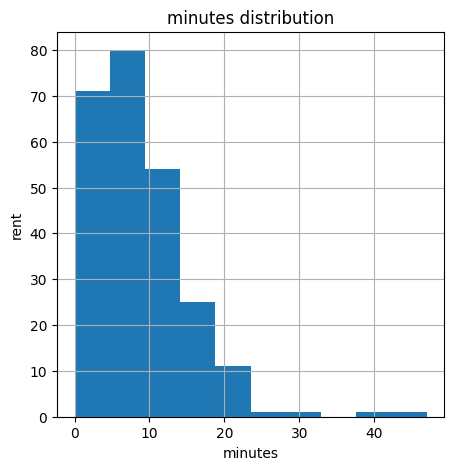

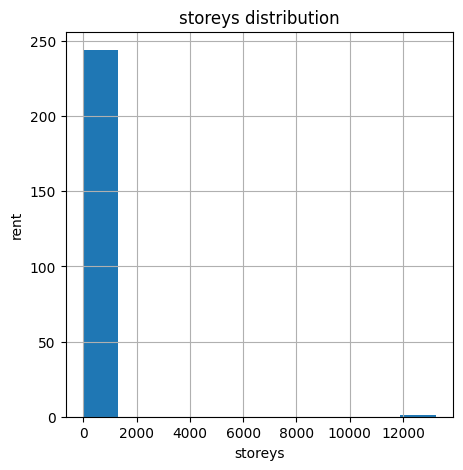

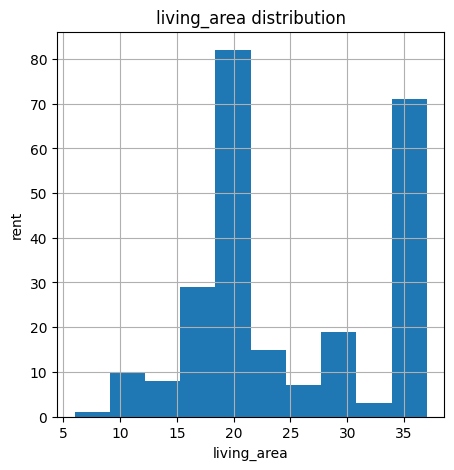

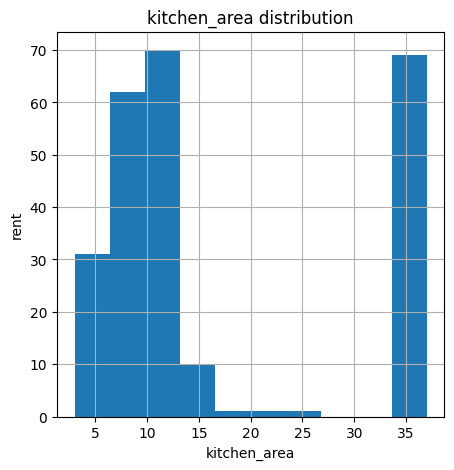

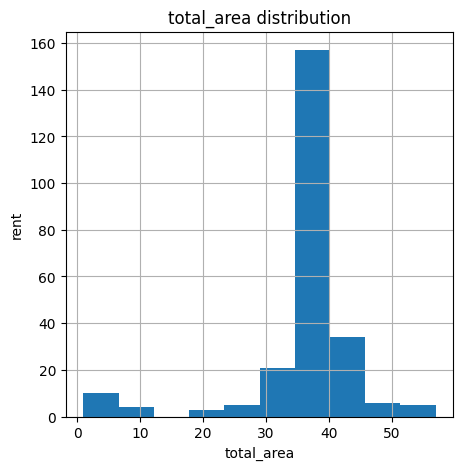

In [ ]:
import matplotlib.pyplot as plt

df_numbers = df.select_dtypes([int, float]).columns
for col in df_numbers:
  plt.figure(figsize=(5, 5))
  plt.title(f'{col} distribution')
  plt.xlabel(col)
  plt.ylabel('rent')
  df[col].hist()
  plt.show()

8. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

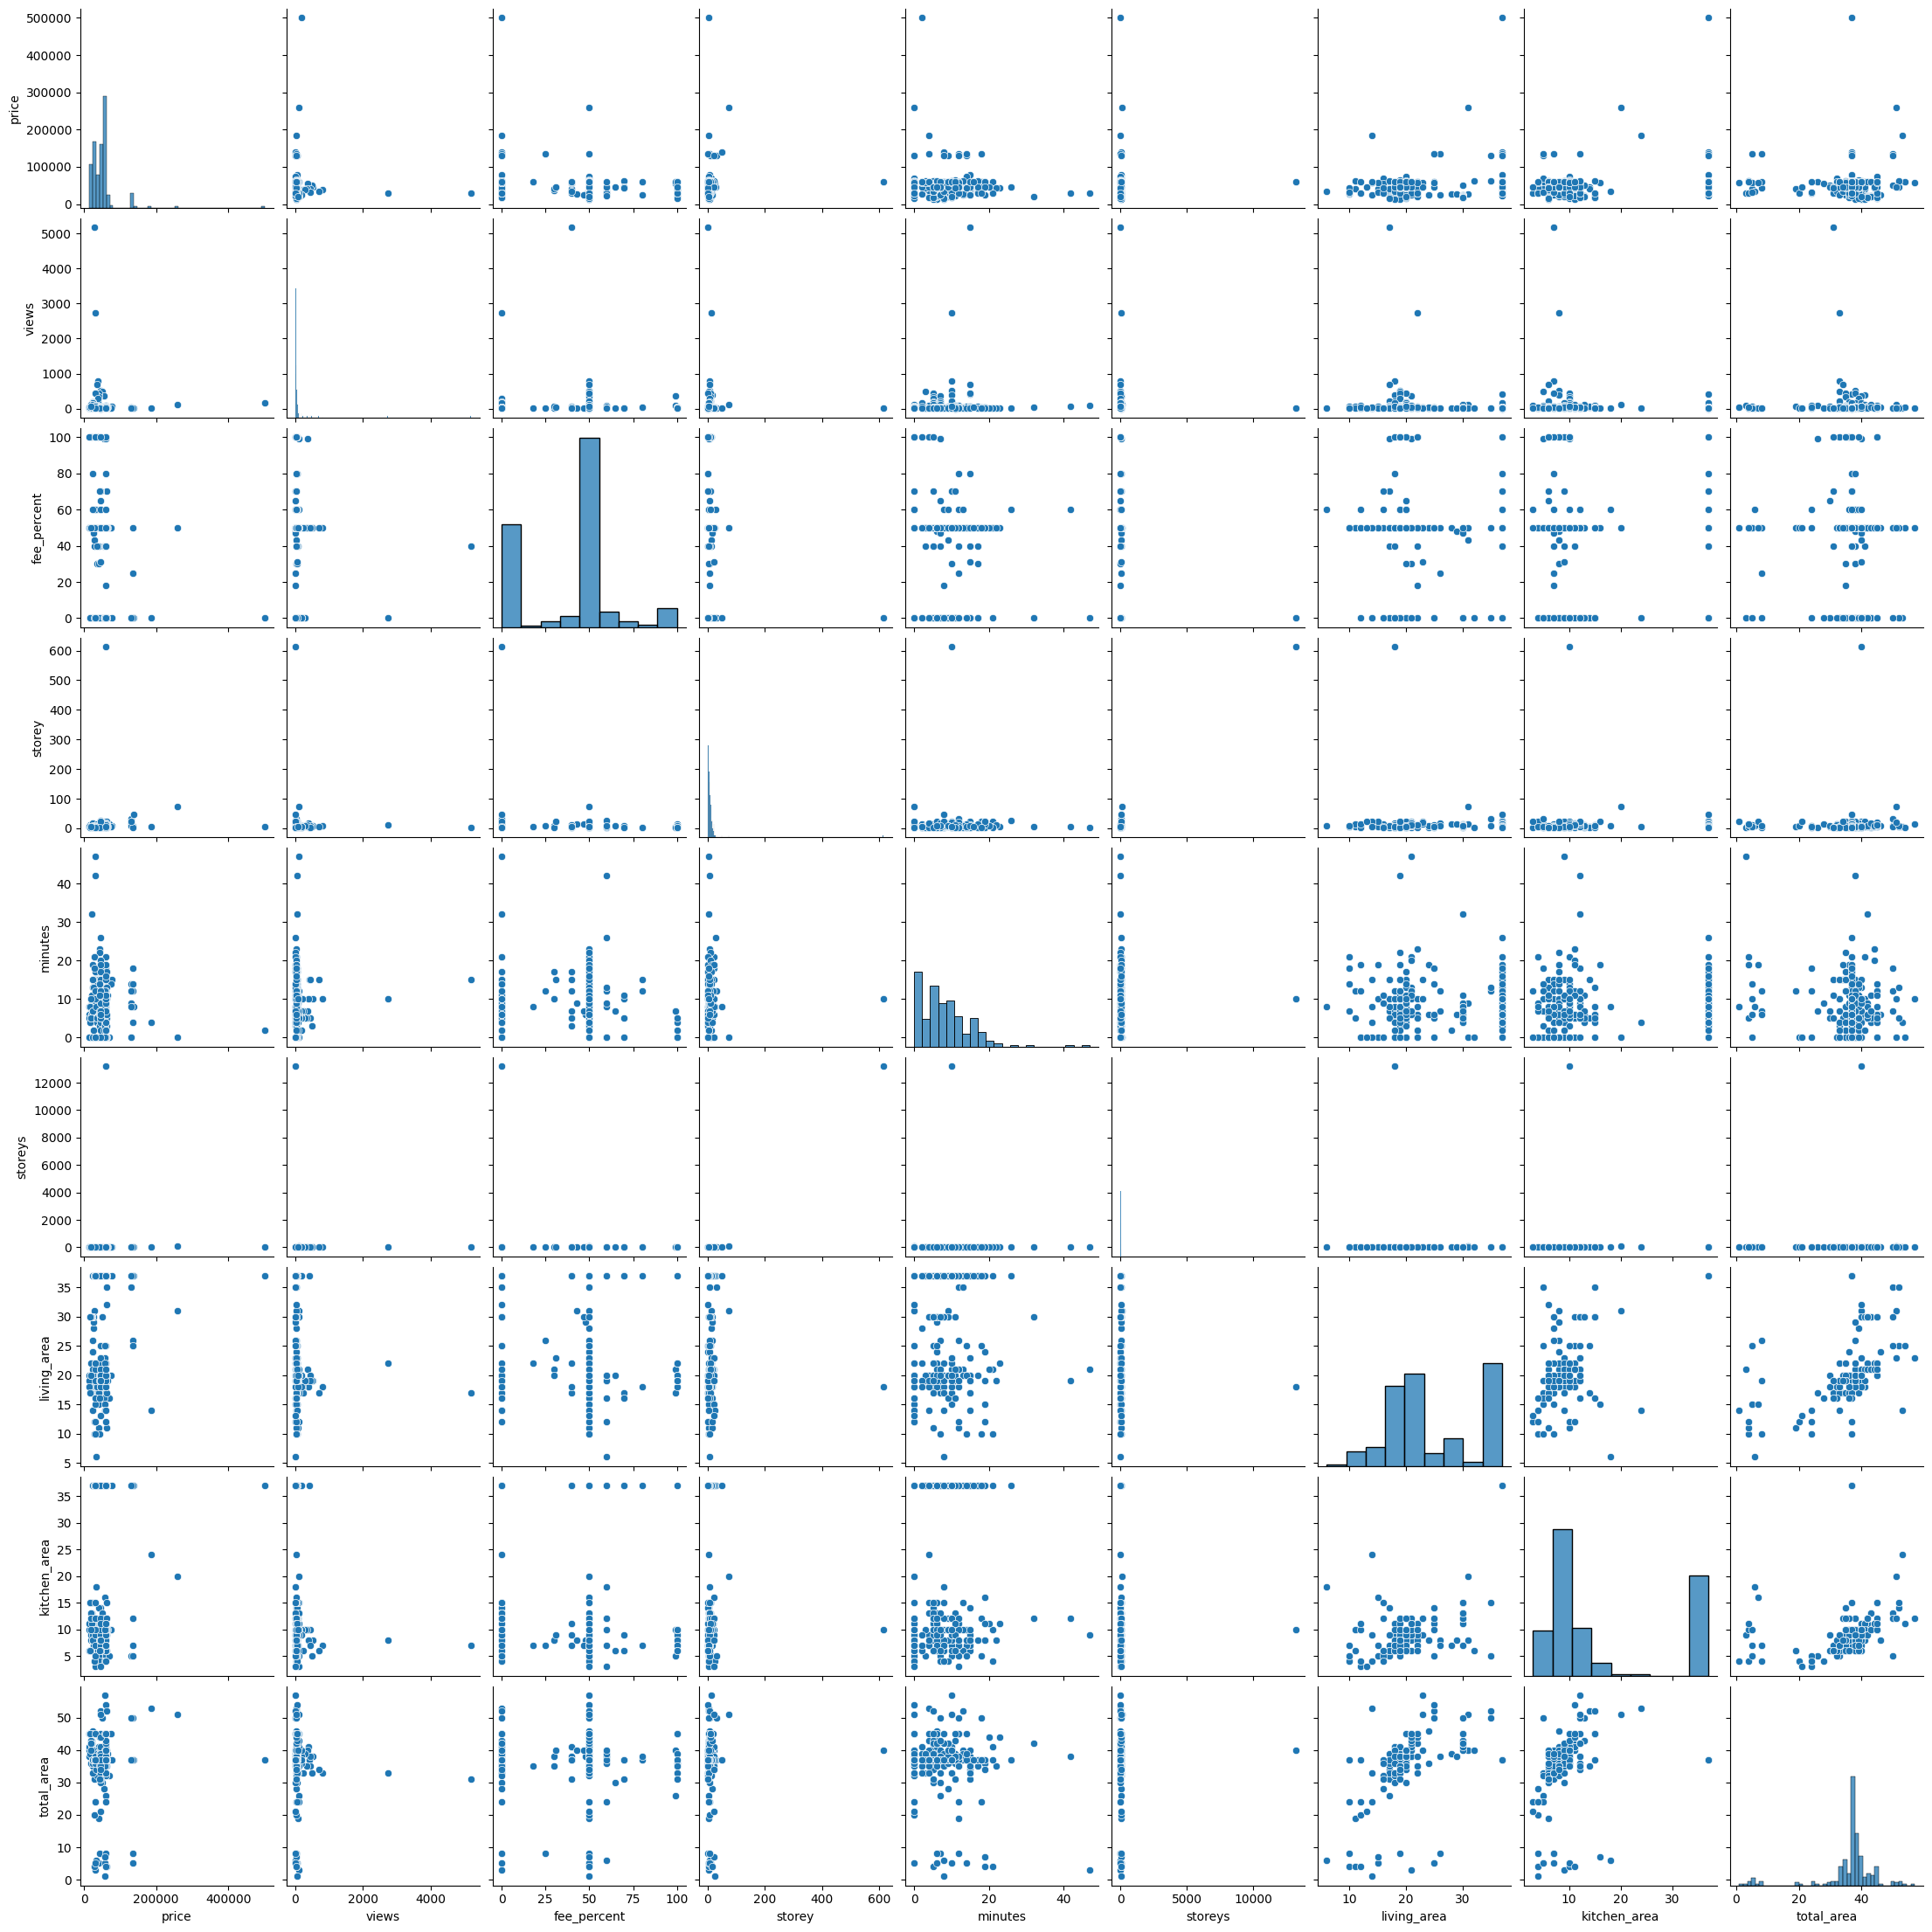

In [ ]:
from tqdm.auto import tqdm
import seaborn as sns
sns.pairplot(df)

9. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**2**)

In [ ]:
df.corr(numeric_only=True)

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
price,1.000000,-0.046706,-0.159946,0.070441,-0.074924,0.018541,0.211085,0.243515,0.006046
views,-0.046706,1.000000,-0.026805,-0.019725,0.078572,-0.013235,-0.103415,-0.106179,-0.037596
fee_percent,-0.159946,-0.026805,1.000000,-0.087791,-0.043229,-0.089446,-0.287182,-0.217804,-0.049272
storey,0.070441,-0.019725,-0.087791,1.000000,0.027628,0.982579,-0.048015,-0.040404,0.039210
minutes,-0.074924,0.078572,-0.043229,0.027628,1.000000,0.018024,-0.016318,-0.006020,-0.142629
storeys,0.018541,-0.013235,-0.089446,0.982579,0.018024,1.000000,-0.051725,-0.034357,0.027002
living_area,0.211085,-0.103415,-0.287182,-0.048015,-0.016318,-0.051725,1.000000,0.885334,0.314532
kitchen_area,0.243515,-0.106179,-0.217804,-0.040404,-0.006020,-0.034357,0.885334,1.000000,0.142474
total_area,0.006046,-0.037596,-0.049272,0.039210,-0.142629,0.027002,0.314532,0.142474,1.000000


<Axes: >

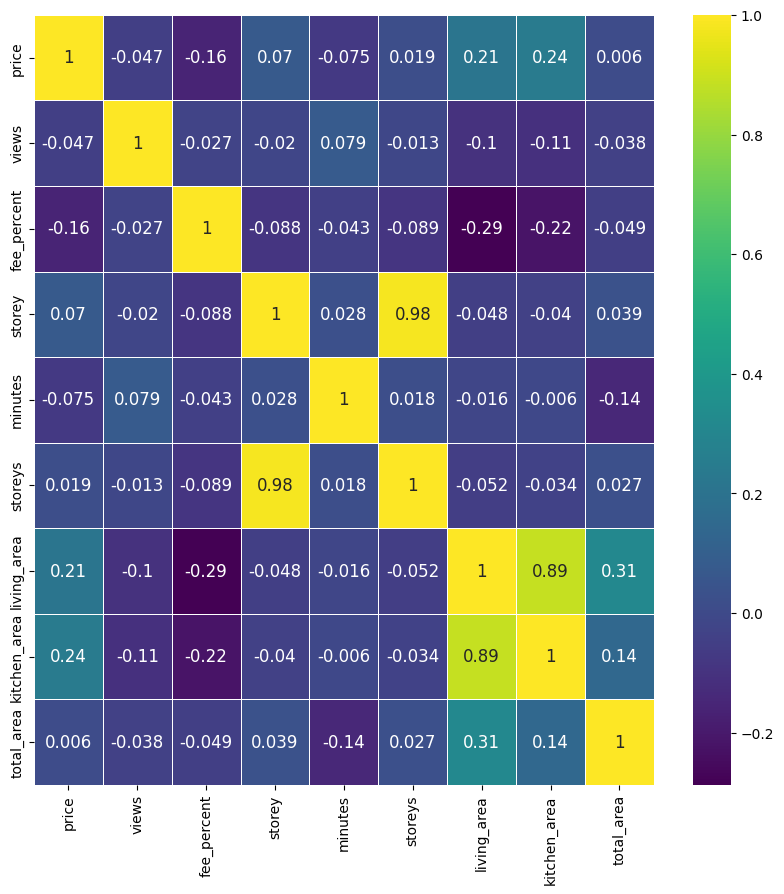

In [ ]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Хорошая линейная связь наблюдается у столбцов: "storey" и "storeys", а также "living_area" и "kitchen_area"

#### Часть 2. Построение модели. 50 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# функция обучения
def learn(train_x, train_y, test_x):
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)
    regressor = LinearRegression()
    regressor.fit(train_x_scaled, train_y)
    return regressor.predict(test_x_scaled)

In [ ]:
df_numeric = df.select_dtypes([int, float])
X = df_numeric.drop('price', axis=1)
y = df_numeric['price']

#Разделение датасета на обучающую и тестовую выборку
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

#вызываем функцию обучения
pred_test = learn(train_x, train_y, test_x)

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [ ]:
print(f'MSE: {MSE(test_y, pred_test)}')
print(f'RMSE: {RMSE(test_y, pred_test)}')

MSE: 4237494553.53456
RMSE: 65096.04099739523


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [ ]:
X = df.drop(['price', 'metro'], axis=1)
y = df['price']

#Разделение датасета на обучающую и тестовую выборку
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

#Кодирование переменных way и provider с помощью OneHotEncoding
train_x_one_hot_encoding = pd.get_dummies(train_x, columns =['way', 'provider'])
test_x_one_hot_encoding = pd.get_dummies(test_x, columns=['way', 'provider'])

#вызываем функцию обучения
pred_test_one_hot_encoding = learn(train_x_one_hot_encoding, train_y, test_x_one_hot_encoding)
print(f'MSE: {MSE(test_y, pred_test_one_hot_encoding)}')
print(f'RMSE: {RMSE(test_y, pred_test_one_hot_encoding)}')

MSE: 4251076883.3879323
RMSE: 65200.28284745345


4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [ ]:
def anomaly(df, title):
    Q1 = df[title].quantile(0.25)
    Q3 = df[title].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    anomalies = df[(df[title] > upper_bound)]
    return anomalies

#индексы строк с выбросами по цене
anomaly_price = anomaly(df, 'price').index

# удаляем строки с выбросами по цене
train_x_without_anomaly = train_x_one_hot_encoding.drop(anomaly_price, errors='ignore')
train_y_without_anomaly = train_y.drop(anomaly_price, errors='ignore')

#вызываем функцию обучения
pred_test = learn(train_x_without_anomaly, train_y_without_anomaly, test_x_one_hot_encoding)
mse_sklearn = MSE(test_y, pred_test)
rmse_sklearn = RMSE(test_y, pred_test)
print(f'MSE: {mse_sklearn}')
print(f'RMSE: {rmse_sklearn}')

MSE: 4308874577.469544
RMSE: 65642.01838357458


5. Попробуйте написать свою реализацию функций MSE, RMSE, R2. Функции должны принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**9**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

R2 (коэффициент детерминации) - доля дисперсии, объясненная моделью. Поподробнее о реалиации можно почитать здесь: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
def MSE(y_true, y_pred):
    mse = np.sum((y_true - y_pred) ** 2)
    return mse/len(y_true)

In [ ]:
def RMSE(y_true, y_pred):
    return MSE(y_true, y_pred)**0.5

In [ ]:
def r2(y_true, y_pred):
    y_mean = np.mean(y_true)
    total_ss = np.sum((y_true - y_mean) ** 2)
    residual_ss = np.sum((y_true - y_pred) ** 2)
    return 1 - residual_ss / total_ss

In [ ]:
mse_function = MSE(np.array(test_y), np.array(pred_test))
rmse_function = RMSE(np.array(test_y), np.array(pred_test))
r2_sklearn = r2_score(test_y, pred_test)
r2_function = r2(np.array(test_y), np.array(pred_test))
print(f'mse_sklearn: {mse_sklearn}')
print(f'mse_function: {mse_function}')
print(f'Разница между mse_sklearn и mse_function: {mse_sklearn-mse_function}')
print(f'rmse_sklearn: {rmse_sklearn}')
print(f'rmse_function: {rmse_function}')
print(f'Разница между rmse_sklearn и rmse_function: {rmse_sklearn-rmse_function}')
print(f'r2_sklearn: {r2_sklearn}')
print(f'r2_function: {r2_function}')
print(f'Разница между r2_sklearn и r2_function: {r2_sklearn-r2_function}')

mse_sklearn: 4308874577.469544
mse_function: 4308874577.469544
Разница между mse_sklearn и mse_function: 0.0
rmse_sklearn: 65642.01838357458
rmse_function: 65642.01838357458
Разница между rmse_sklearn и rmse_function: 0.0
r2_sklearn: -0.02857642183381537
r2_function: -0.02857642183381537
Разница между r2_sklearn и r2_function: 0.0


6. Напишите класс CleanData. Этот класс будет отвечать за удаление выбросов, заполнение пропусков и кодирование переменных методами OneHotEncoding и MeanTargetEncoding. (**15**). В классе обязательно должны присутствовать методы fit и transform. transform должен возвращать трансформированный датасет.
Пользователь при создании экземпляра класса может указывать:
- список столбцов для кодирования OneHotEncoding
- список столбцов для кодирования MeanTargetEncoding
- стратегию заполнения пропусков (удаление строк с ними, заполнение средним / медианным значением и т.п.; можете принимать на вход словарь, чтобы реализовать разные стратегии для разных столбцов)
- столбцы, по которым необходимо удалить выбросы (выбросы удаляем только в обучающей выборке)

 Все остальные особенности реализации остаются на Ваше усмотрение.

In [ ]:
from sklearn.base import BaseEstimator

class CleanData(BaseEstimator):
    def __init__(self, target_mean_cols=(), target_ohe_cols = (), d = {}):
        self.target_mean_cols = target_mean_cols
        self.target_ohe_cols = target_ohe_cols
        self.mean_enc = {}
        self.d = d

    def fit(self, X, y):
        '''
        Подсчет энкодингов
        '''
        self.mean_enc = {}
        for col in self.target_mean_cols:
             X[col] = X[col].str.strip()
             self.mean_enc[col] = pd.concat([X, y], axis=1).groupby(col)[y.name].mean()
        self.y_median = y.median()
        return self

    def transform(self, X):
        df_with_cat = self.nun(X)
        df_with_cat = pd.get_dummies(X, columns = self.target_ohe_cols)
        for col in self.target_mean_cols:
            df_with_cat[col] = df_with_cat[col].str.strip()
            df_with_cat[f'{col}_m_enc'] = df_with_cat[col].map(self.mean_enc[col]).fillna(self.y_median)
            df_with_cat.drop([col], axis=1, inplace=True)
        return df_with_cat

    def nun(self, X):
        for col, strategy in self.d.items():
            if strategy == 'mean':
                X[col].fillna(X[col].mean(), inplace=True)
            elif strategy == 'median':
                X[col].fillna(X[col].median(), inplace=True)
        return X

7. Создайте и обучите пайплайн из CleanData, StandardScaler, LinearRegression. Посчитайте метрики. **(6)**

In [ ]:
from sklearn.pipeline import Pipeline

X = df.drop('price', axis=1)
y = df['price']

#Разделение датасета на обучающую и тестовую выборку
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
#индексы строк с выбросами по цене
anomaly_price = anomaly(df, 'price').index

# удаляем строки с выбросами по цене
train_x_without_anomaly = train_x.drop(anomaly_price, errors='ignore')
train_y_without_anomaly = train_y.drop(anomaly_price, errors='ignore')

pipeline_final = Pipeline(steps=[
    ('encoder',  CleanData(target_mean_cols=['metro'], target_ohe_cols = ['way', 'provider'], d = {'metro':'drop'})),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline_final.fit(train_x_without_anomaly,  train_y_without_anomaly)
pred_test = pipeline_final.predict(test_x)
print(f'MSE: {MSE(test_y, pred_test)}')
print(f'RMSE: {RMSE(test_y, pred_test)}')
print(f'r2: {r2(test_y, pred_test)}')

MSE: 4271727452.8869653
RMSE: 65358.453568662146
r2: -0.019708988865505983


## Задача 2. (15 баллов)

### 2.1 (10)
Напишите код, который будет асинхронно загружать данные из нескольких веб-страниц. Используйте библиотеку aiohttp для выполнения HTTP-запросов. Программа должна выводить количество символов, загруженных из каждой страницы.

In [ ]:
import asyncio
import aiohttp

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            status = response.status
            text = await response.text()
            return text

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results =  await asyncio.gather(*tasks)
    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")
urls = [
        'https://ru.wikipedia.org/',
        'https://www.google.com/',
        'https://www.python.org/',
        'https://www.github.com/'
    ]

await main(urls)

https://ru.wikipedia.org/: 152482 символов
https://www.google.com/: 22276 символов
https://www.python.org/: 51057 символов
https://www.github.com/: 256948 символов


### 2.2 (**5**)

Какие ошибки могут возникнуть в процессе исполнения кода выше? Как их можно обработать? Добавьте обработку ошибок в Ваш код.

Например, могут возникнуть ошибки подключения к url(NonHttpUrlClientError, InvalidUrlClientError, ClientConnectorDNSError), а также ошибки https статуса при доступе к url

In [ ]:
import traceback
from aiohttp import ClientError

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        try:
            async with session.get(url) as response:
                status = response.status
                if status==200:
                    text = await response.text()
                    return text
                else:
                    return f"Ошибка: HTTP статус {status} при доступе к {url}"
        except (ClientError) as e:
            return f"Ошибка подключения к {url}: {str(e)}"

async def main(urls):
    tasks = [fetch(url) for url in urls]
    results =  await asyncio.gather(*tasks)
    for url, content in zip(urls, results):
        if "Ошибка" not in content:
            print(f"{url}: {len(content)} символов")
        else:
            print(content)

In [ ]:
urls = [
        'htts://ru.wikipedia.org/',
        'https://www.google.com/',
        'https://www.python.org/',
        'https://www.github.com/',
        'https:/tanya',
        'http://abc.go.com/%'
    ]

await main(urls)

Ошибка подключения к htts://ru.wikipedia.org/: htts://ru.wikipedia.org/
https://www.google.com/: 22241 символов
https://www.python.org/: 51057 символов
https://www.github.com/: 256949 символов
Ошибка подключения к https:/tanya: https:///tanya
Ошибка: HTTP статус 404 при доступе к http://abc.go.com/%


## Задава 3 (25 баллов)


Напишите класс **Task**. У него должны быть следующие атрибуты:
* `number` - номер задачи
* `name` - название задачи


Напишите метод `init` (**2 балла**)

Переопределите для класса метод `str`, который вернет строку вида `f"{number}.{name}"`. (**3 балла**)

Теперь напишите класс **ProgrammingTask**, который является наследником класса Task.

Он должен дополнительно иметь методы:
* `language` - язык программирования (строка) - **1 балла**
* `list_of_students` - список студентов (список list, элементы которого - строки), которые решили задачу. По умолчанию список пустой. **(1 балл)**


Этот класс должен поддерживать следующие методы:
* `str `- вернет строку вида `f"{number}.{name} ({language})"`. **2 балла**
* `get_student_list`(без дополнительных аргументов) - возвращает значение `list_of_students`. **2 балла**
* `add_student` - принимает строку с фамилией студента и обновляет аргумент `list_of_students`. **2 балла**
* `task_from_str` - метод, который принимает на вход строку в формате `f"{number}.{name}.{language}"`
и возращает объект `Task` с соответствующими значениями number и name и значением `list_of_students` - пустой список. **2 балла**
* добавьте возможность сравнивать задачи между собой с помощью знака `==`. Сравнение должно возвращать True, если у задач совпадают номера и названия. **2 балла**


Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

In [ ]:
from typing import List, Union
from dataclasses import dataclass, field

@dataclass
class Task:
    number: int
    name: str

    def __str__(self) -> str:
        """
        Возвращает строковое представление задачи в формате 'number.name'
        """
        return f"{self.number}.{self.name}"

@dataclass
class ProgrammingTask(Task):
    language: str
    list_of_students: List[str] = field(default_factory=list)

    def __str__(self) -> str:
        """
        Возвращает строковое представление задачи в формате 'number.name (language)'
        """
        result = super().__str__()
        return f"{result} ({self.language})"

    def get_student_list(self) -> List[str]:
        """
        Возвращает значение list_of_students
        """
        return self.list_of_students

    def add_student(self, string: str) -> 'ProgrammingTask':
        """
        Принимает строку с фамилией студента и обновляет аргумент list_of_students
        """
        self.list_of_students.append(string)
        return self

    @classmethod
    def task_from_str(cls, string: str) -> 'ProgrammingTask':
        """
        Возвращает экземпляр класса ProgrammingTask с соответствующими значениями number, name, language и значением list_of_students - пустой список
        """
        number, name, language = string.split('.')
        return cls(int(number), name, language, list_of_students = [])

    def __eq__(self, other: Union[Task, 'ProgrammingTask']) -> bool:
        """
        Возвращает результат сравнения задачи между собой с помощью знака ==
        """
        return self.number == other.number and self.name == other.name


In [ ]:
6# Создаем список задач
tasklist: List[Union[Task, ProgrammingTask]] = [
    Task(1, "Сумма"),
    ProgrammingTask(2, "Деление", "С++"),
    Task(3, "Разность"),
    ProgrammingTask(1, "Произведение", "Java"),
    ProgrammingTask(3, "Join", "Python"),
    Task(2, "Pandas")
]
# Сортировка задач по номеру, а при совпадении номера - по названию
tasklist.sort(key=lambda task: (task.number, task.name))

for task in tasklist:
    print(task)

1.Произведение (Java)
1.Сумма
2.Pandas
2.Деление (С++)
3.Join (Python)
3.Разность


In [ ]:
person = ProgrammingTask.task_from_str("1.деление.python")
print(person)

1.деление (python)


In [ ]:
# этот код можете использовать для проверки Вашего класса
task1 = Task(1, 'A')
print(task1)
print(task1.number)
print(task1.name)
task2 = ProgrammingTask(1, 'A', 'python')
print(task2)
print(task2.number)
print(task2.name)
print(task2.language)
print(task2.get_student_list())
task2.add_student('Student1')
print(task2.get_student_list())
task3 = ProgrammingTask(1, 'A', 'C++')
task4 = ProgrammingTask(3, 'A', 'python')
print(task2 == task3)
print(task2 == task4)

1.A
1
A
1.A (python)
1
A
python
[]
['Student1']
True
False
